In [27]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [28]:
exp_one_new = pd.read_csv("open_ms_eval/experiment_one_240130.csv")

In [28]:
exp_one_new

,modi_pos,modi_mass,experiment,subexperiment,hit,variant,next_max
0,1.110000e+02,43229.3,Standard,close,769,0,22
1,1.110000e+02,43229.3,Standard,open,769,265,29
2,1.400000e+01,43271.3,Standard,close,0,0,17
3,1.400000e+01,43271.3,Standard,open,386,265,30
4,3.840000e+02,43351.2,Standard,close,0,0,24
5,3.840000e+02,43351.2,Standard,open,0,0,30
6,3.740000e+02,43431.2,Standard,close,0,0,21
7,3.740000e+02,43431.2,Standard,open,0,0,31
8,1.900000e+01,43473.2,Standard,close,0,0,25
9,1.900000e+01,43473.2,Standard,open,0,0,29


In [29]:
exp_one_new = exp_one_new[(exp_one_new[" modi_mass"] <=  43351.2) ++ (exp_one_new[" modi_mass"] >=  43675.2)]

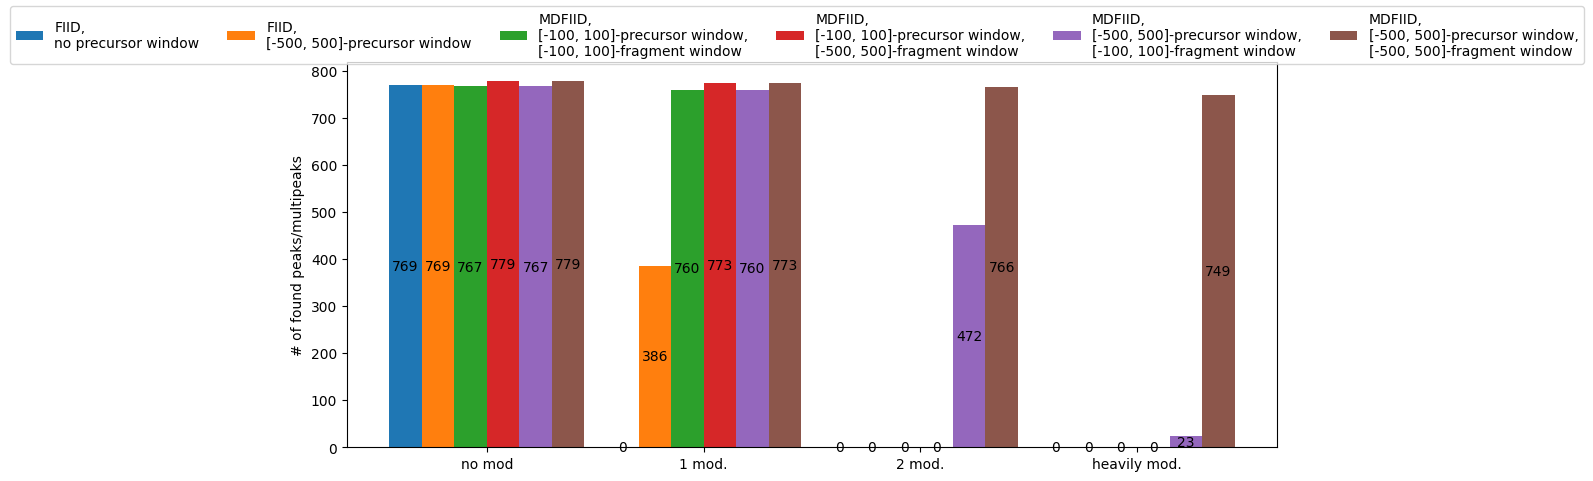

In [85]:
mapping = {" close" :"FIID,\nno precursor window",
          " open" : "FIID,\n[-500, 500]-precursor window",
          "100_100" : "MDFIID,\n[-100, 100]-precursor window,\n[-100, 100]-fragment window",
          "100_500" : "MDFIID,\n[-100, 100]-precursor window,\n[-500, 500]-fragment window",
          "500_100" : "MDFIID,\n[-500, 500]-precursor window,\n[-100, 100]-fragment window",
          "500_500" : "MDFIID,\n[-500, 500]-precursor window,\n[-500, 500]-fragment window"}
fig, ax = plt.subplots(figsize=(12, 5))
counter = 0
width = 0.15  # the width of the bars
multiplier = 0
for engine in [" close", " open", "100_100", "100_500", "500_100", "500_500"]:
    temp_e = exp_one_new[exp_one_new[" subexperiment"] == engine]
    x = np.arange(temp_e.shape[0])
    p = ax.bar(x + width * multiplier, temp_e[" hit"], width, label = mapping[engine])
    multiplier += 1
    ax.bar_label(p ,label_type='center')
    
ax.set_xticks(x + 2.5*width, ["no mod", "1 mod.", "2 mod.", "heavily mod."])
fig.legend(loc='upper center', ncol = 6)
ax.set_ylabel('# of found peaks/multipeaks')

plt.show()

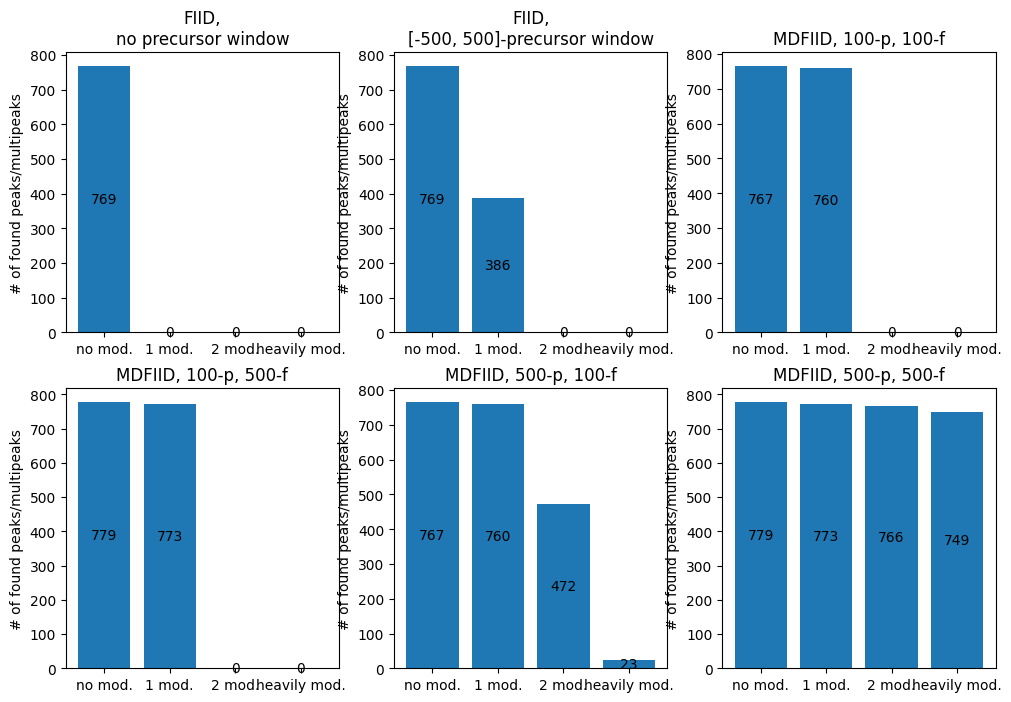

In [84]:
mapping = {" close" :"FIID,\nno precursor window",
          " open" : "FIID,\n[-500, 500]-precursor window",
          "100_100" : "MDFIID, 100-p, 100-f",
          "100_500" : "MDFIID, 100-p, 500-f",
          "500_100" : "MDFIID, 500-p, 100-f",
          "500_500" : "MDFIID, 500-p, 500-f"}
fig, ax = plt.subplots(2,3 ,figsize=(12, 8))
counter = 0
for engine in [" close", " open", "100_100", "100_500", "500_100", "500_500"]:
    temp_e = exp_one_new[exp_one_new[" subexperiment"] == engine]
    p = ax[ int(counter / 3), counter%3].bar(["no mod.", "1 mod.", "2 mod.", "heavily mod."], temp_e[" hit"])
    ax[ int(counter / 3), counter%3].bar_label(p ,label_type='center')
    ax[ int(counter / 3), counter%3].set_ylabel("# of found peaks/multipeaks")
    ax[ int(counter / 3), counter%3].set_title(mapping[engine])
    
    
    counter += 1
plt.show()

In [29]:
exp_one_new = pd.read_csv("open_ms_eval/experiment_one_240130.csv")
exp_one_new

,modi_pos,modi_mass,experiment,subexperiment,hit,variant,next_max
0,1.110000e+02,43229.3,Standard,close,769,0,22
1,1.110000e+02,43229.3,Standard,open,769,265,29
2,1.400000e+01,43271.3,Standard,close,0,0,17
3,1.400000e+01,43271.3,Standard,open,386,265,30
4,3.840000e+02,43351.2,Standard,close,0,0,24
5,3.840000e+02,43351.2,Standard,open,0,0,30
6,3.740000e+02,43431.2,Standard,close,0,0,21
7,3.740000e+02,43431.2,Standard,open,0,0,31
8,1.900000e+01,43473.2,Standard,close,0,0,25
9,1.900000e+01,43473.2,Standard,open,0,0,29


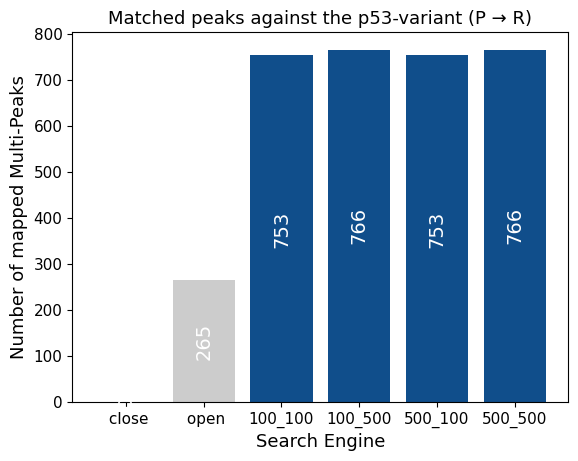

In [39]:
color = ["#104E8B", "#6E8DAB"]

exp_one_new_det_var = exp_one_new[exp_one_new[" modi_mass"] == 43229.3]
p = plt.bar(exp_one_new_det_var[" subexperiment"], exp_one_new_det_var[" variant"], color = ['#CCCCCC', '#CCCCCC',
                                                                                             "#104E8B",  "#104E8B",
                                                                                             "#104E8B",  "#104E8B"])
plt.bar_label(p, label_type= 'center', color = 'w', size = 14, rotation = 90)
plt.xlabel("Search Engine", size = 13)
plt.ylabel("Number of mapped Multi-Peaks", size = 13)
plt.title("Matched peaks against the p53-variant (P \u2192 R)", size = 13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 11)
plt.savefig("p53_variant.png",  bbox_inches = 'tight', dpi = 500)

In [41]:
def avrg(col):
    return sum(col)/len(col)
exp_one_new.groupby(" subexperiment")[" next_max"].apply(avrg)

 subexperiment
 close     21.875
 open      29.375
100_100     6.875
100_500    25.875
500_100     8.375
500_500    31.625
Name:  next_max, dtype: float64

In [42]:
exp_one_new_histo = pd.read_csv("open_ms_eval/experiment_one_histo_240130.csv")

In [43]:
exp_one_new_histo

,modi_pos,modi_mass,experiment,subexperiment,peptide,number_hits
0,111,43229.3,Standard,close,tr|F1SY23|F1SY23_BOVIN,769
1,111,43229.3,Standard,close,tr|F1SY23|F1SY23_BOVIN,769
2,111,43229.3,Standard,close,sp|P67939|P53_BOVIN,769
3,111,43229.3,Standard,close,tr|F1MK61|F1MK61_BOVIN,22
4,111,43229.3,Standard,close,tr|F1MK61|F1MK61_BOVIN,22
...,...,...,...,...,...,...
2085,3260971645929324585,43675.2,Multi_dim,500_500,tr|A0A3Q1N924|A0A3Q1N924_BOVIN,12
2086,3260971645929324585,43675.2,Multi_dim,500_500,sp|Q5E9U3|TMM79_BOVIN,12
2087,3260971645929324585,43675.2,Multi_dim,500_500,tr|F1MNV8|F1MNV8_BOVIN,12
2088,3260971645929324585,43675.2,Multi_dim,500_500,tr|A0A3Q1N8D3|A0A3Q1N8D3_BOVIN,11


In [95]:

Z

[25, 31, 10, 34, 10, 34]

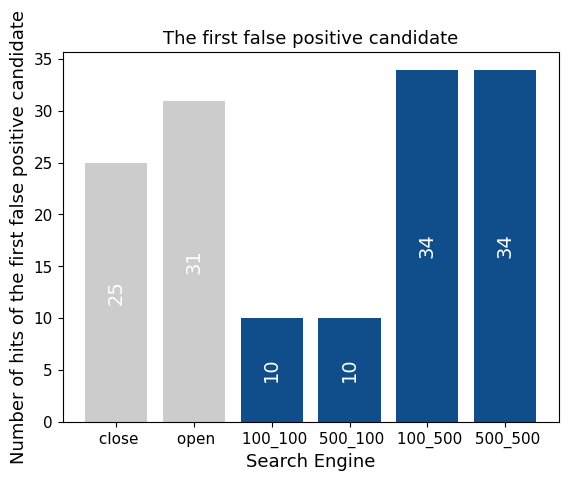

In [46]:
def special_average(df):
    df2 = df[((df[" peptide"] != "tr|F1SY23|F1SY23_BOVIN") == (df[" peptide"] != "sp|P67939|P53_BOVIN")) == (df[" peptide"] != "tr|Q0Z9Z4|Q0Z9Z4_BOVIN")]
    return df2[" number_hits"].max()
    

average_false_hits = exp_one_new_histo.groupby(" subexperiment").apply(special_average)
average_false_hits
custom_sort = [2,4,3,5,0,1]
Z = [x for _,x in sorted(zip(custom_sort,average_false_hits))]
index = [x for _,x in sorted(zip(custom_sort,average_false_hits.index))]

p = plt.bar(index, Z, color = ['#CCCCCC', '#CCCCCC', "#104E8B",  "#104E8B", "#104E8B",  "#104E8B"])
plt.bar_label(p, label_type='center', rotation = 90, size = 14, color = 'w')
plt.xlabel("Search Engine",size = 13)
plt.ylabel("Number of hits of the first false positive candidate", size = 13)
plt.title("The first false positive candidate",size = 13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 11)
plt.savefig("p53_first_false_positive.png",  bbox_inches = 'tight', dpi = 500)


In [3]:
exp_one = pd.read_csv("open_ms_eval/experiment_one_240130.csv")

C:\Users\rapha\AppData\Local\Temp\ipykernel_15440\2781971878.py:7: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(scatter, label='Color')


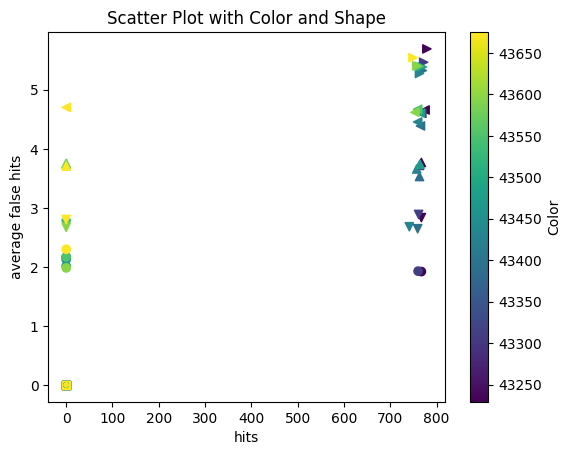

In [28]:
gr = exp_one.groupby(" subexperiment")
for name, data in gr:
    plt.scatter(data[" hit"], data[" average_false_peaks"],  c = data[" modi_mass"], marker = ma[name])
plt.xlabel('hits')
plt.ylabel('average false hits')
plt.title('Scatter Plot with Color and Shape')
plt.colorbar(scatter, label='Color')
plt.show()

Text(0.5, 1.0, 'Scatter Plot with Color and Shape')

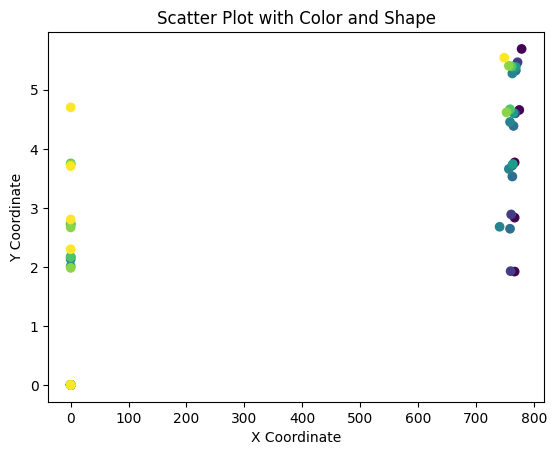

In [24]:
ma = {" open": ".", " close" : ",", "100":"o", "200": "v", "300": "^", "400":"<", "500" : ">"}
exp_one.groupby(" subexperiment").scatter = plt.scatter(exp_one[" hit"], exp_one[" average_false_peaks"],  c = exp_one[" modi_mass"])
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Scatter Plot with Color and Shape')

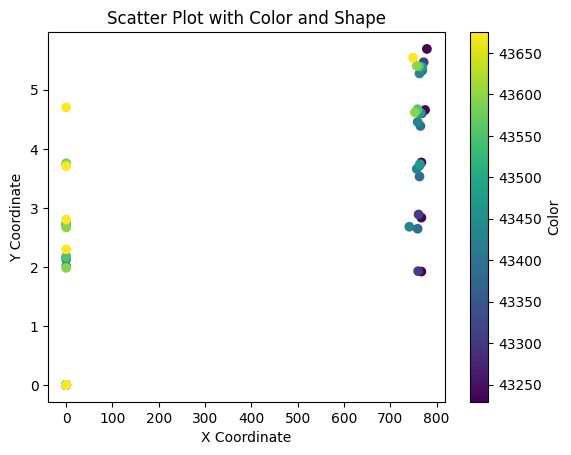

In [14]:
scatter = plt.scatter(exp_one[" hit"], exp_one[" average_false_peaks"],  c = exp_one[" modi_mass"])
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Scatter Plot with Color and Shape')

# Add colorbar
plt.colorbar(scatter, label='Color')

# Show the plot
plt.show()

In [4]:
exp_one.columns = [x.replace(' ','') for x in exp_one.columns]

Standard
Multi_dim


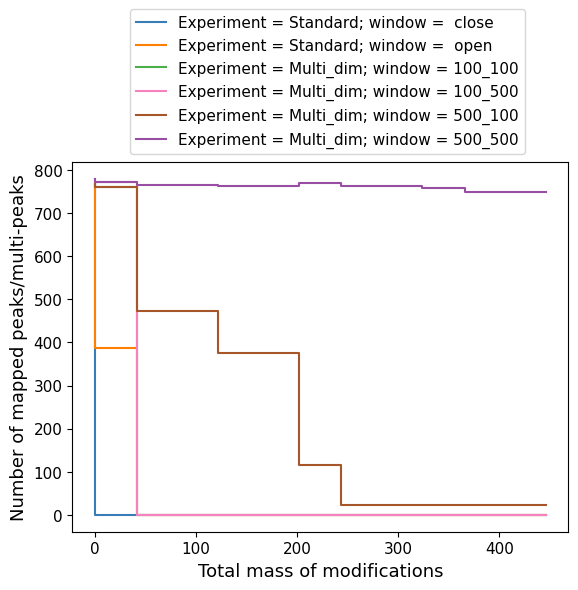

In [25]:
color_c = 0
for e_up in exp_one['experiment'].unique():
    print(e_up)
    for e_low in exp_one.loc[exp_one['experiment'] == e_up, "subexperiment"].unique():
        y = exp_one.groupby(["experiment", "subexperiment"]).apply(lambda x: x["hit"])[e_up][e_low]
        x = exp_one.groupby(["experiment", "subexperiment"]).apply(lambda x: x['modi_mass'])[e_up][e_low]
        x = x - x.iloc[0,]
        plt.step(x, y, label = f'Experiment = {e_up}; window = {e_low}', color = CB_color_cycle[color_c])
        plt.legend(bbox_to_anchor=(0.1, 1), fontsize = 11)
        plt.tick_params(axis = 'both', which = 'major', labelsize = 11)
        plt.xlabel("Total mass of modifications",size = 13)
        plt.ylabel("Number of mapped peaks/multi-peaks", size = 13)
        color_c += 1
   
plt.savefig("where_FIID_fails.png",  bbox_inches = 'tight', dpi = 500)

The 3rd and 4th plot are rather useless, because here the values are constant. What makes sense, bc the modification does not influence the other values in the library

